# Deep Learning Fundamentals 4 - Vanishing/Exploiding Gradient Problem 1

In this notebook and the following three, we will talk about a very important problem that affected Neural Networks for a long time (also we had this problem in our previous regression example with deep learning).

The vanishing gradient problem refers to the situation in which gradients get smaller and smaller as the neurons project to the lower layers. As a result of gradients getting smaller, the update rule becomes almost inoperative on weights, thereby never converging to a good solution. On the other hand, the exploding gradient problem generally occurs with Recurrent Neural Networks and refers to the situation of gradients getting bigger and bigger thereby causing the algorithm to diverge.

The unstable gradient problem was one of the reasons that Deep Neural Networks were abandoned in the 2000s. In 2010 Xavier Glorot and Yoshua Bengio published a [paper](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)  in which they pointed out some suspects of this problem. In the paper, they pointed out that because of the initialization technique (initialization with a normal distribution with zero mean and one standard deviation) and because of the activation function (sigmoid) the variance keeps increasing at each layer while the activation function gets saturated at the top layers. This saturation gets even worse because of some constrictions of logistic function such as when the inputs are large the function gets saturated at 0 or 1 because at 0 or 1 the derivative almost becomes 0. This cause the backpropagation algorithm to have an extremely low gradient to propagate back through the neural network.

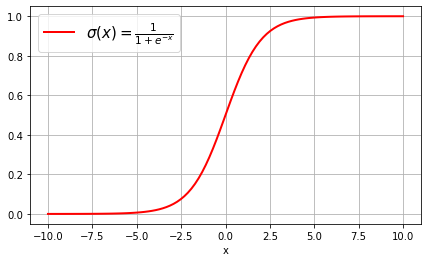

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 100,1000)
sig = 1 / (1 + np.exp(-x))
plt.figure(figsize=(7, 4))
plt.grid()
plt.plot(x, sig, "r-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(fontsize=15)
plt.show()

In the paper, Glorot and Bengio proposed a way to cope with the gradient problems. They argue that one of the ways to cope with the gradient problem is that the variance of the outputs at each layer must be equal to the variance of its inputs, in addition, the gradients should have equal variance before and after flowing through a layer in a reverse direction. Even though this is not actually possible to guarantee unless the layer has the same number of inputs and neurons, the authors proposed a good way that works well in practice.


The initilization algorithm for sigmoid function: randomly initialize the weights of each layer as having a gaussian distribution with $\mu =0$ and $\sigma =\frac{2}{fan_{in}+fan_{out}}$ 

$fan_{in}$ is the number of inputs to the layer and $fan_{out}$ is the number of outputs from the layer.

Glorot initialization can be used with softmax, logistic and tangent hiperbolic activation functions. For ReLU or ELU activation function we can use an alternative of Glorot initialization called He initilization ([paper](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf)). He initilization scales the standard deviation as $\sigma =\frac{2}{fan_{in}}$. Moreover, for SELU activation function we can use LeCun initilization (this initilization method is actually older than He and Glorot). Standard deviation for LeCun initilization is $\sigma =\frac{1}{fan_{in}}$ 

# Initialization from Scratch

In the section below, we will implement four initialization from scratch

1. Zero Initialization
2. Random Initialization
3. Glorot Initialization
4. He Initialization

**Important note:** These initialization codes are taken from my assignments for Deep Learning Specilization on Coursera.

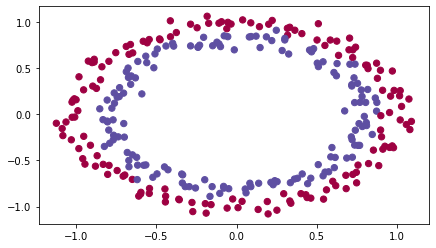

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from utils.helper_func import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from utils.helper_func import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

I will try out each initialization technique on a shallow neural network with 3 layers. Let's implement this model first.

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == "glorot":
        parameters = initialize_parameters_glorot(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 1. Zero Initialization

In this part, I will initialization all the weights and bias terms as zero even though this is not a good idea. Why? Because initializing all the weights and biases to zero results in every neuron in each layer to learn the same thing. In other words, we will be updating all the neurons with the same rate, which will cause the network to fail to break symmetry. This will result that in the end we will have nothing but a linear classifier (since we are using logistic function in the last output layer, we will get a logistic regression classifier)

In [4]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Let's train the model

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


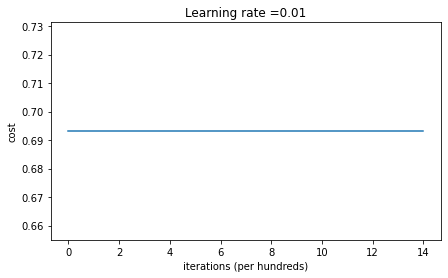

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [6]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

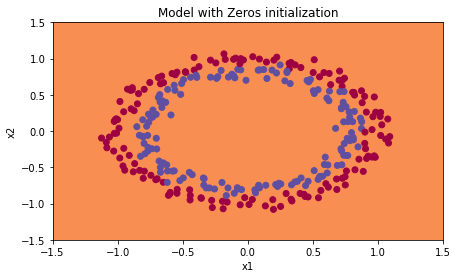

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

As you can see, for each iteration we always get the same results and the model predicts as good as a no-skill classifier.

## 2. Random Initialization

In order to break the symmetry, we can randomly initialize the weights.

In [8]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: inf


C:\Users\gorke\Repository\DL\repo\utils\helper_func.py:152: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\gorke\Repository\DL\repo\utils\helper_func.py:152: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.6250982793959966
Cost after iteration 2000: 0.5981216596703697
Cost after iteration 3000: 0.5638417572298645
Cost after iteration 4000: 0.5501703049199763
Cost after iteration 5000: 0.5444632909664456
Cost after iteration 6000: 0.5374513807000807
Cost after iteration 7000: 0.4764042074074983
Cost after iteration 8000: 0.39781492295092263
Cost after iteration 9000: 0.3934764028765484
Cost after iteration 10000: 0.3920295461882659
Cost after iteration 11000: 0.38924598135108
Cost after iteration 12000: 0.3861547485712325
Cost after iteration 13000: 0.384984728909703
Cost after iteration 14000: 0.3827828308349524


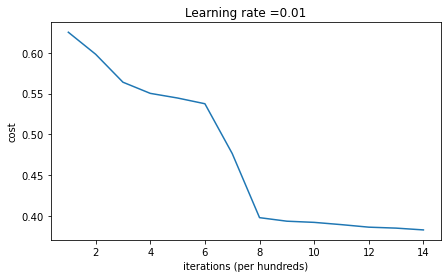

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [10]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

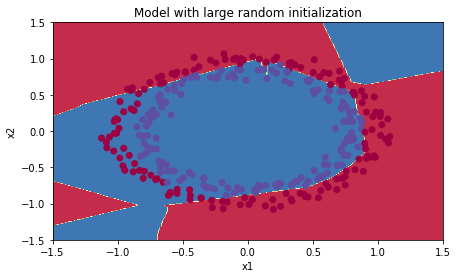

In [11]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

We randomly initilized the weights and the performance improved a lot compared to the previous model. This is because each neuron at each layer had the chance of learning a different inputs from the previous layer. One question is that whether or not we can improve this randomly initialization. In other words, can we randomly initilize with a more optimized values ? Let's use Glorot or He initialization and see.

## 3. Glorot Initialization

In the Coursera specialization, we didn't implement Glorot Initialization but I wanted to implement it here. So I adapted the code a bit to implement Glorot initialization.

In [12]:
def initialize_parameters_glorot(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
    import math
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2./(layers_dims[l-1]+layers_dims[l]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))*math.sqrt(2./(layers_dims[l-1]+layers_dims[l]))     
    return parameters

In [13]:
parameters = initialize_parameters_glorot([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.03266513  0.25201908]
 [ 0.05571284 -1.07588801]
 [-0.16015015 -0.20482019]
 [-0.04777082 -0.36199901]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.02771304 -0.30181918 -0.83096103  0.55948432]]
b2 = [[0.]]


Cost after iteration 0: 0.7221708090786466
Cost after iteration 1000: 0.6980529343944162
Cost after iteration 2000: 0.691553512668888
Cost after iteration 3000: 0.6889550202891771
Cost after iteration 4000: 0.6858649238739213
Cost after iteration 5000: 0.6808691664528034
Cost after iteration 6000: 0.6716741837019392
Cost after iteration 7000: 0.6549333494282477
Cost after iteration 8000: 0.6229241503212861
Cost after iteration 9000: 0.5662898268194068
Cost after iteration 10000: 0.48051779541292267
Cost after iteration 11000: 0.3809485130283596
Cost after iteration 12000: 0.291960990126856
Cost after iteration 13000: 0.22337778520038892
Cost after iteration 14000: 0.1748085167116298


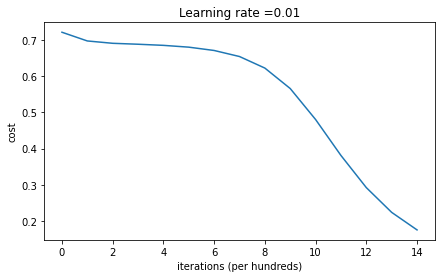

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.95


In [14]:
parameters = model(train_X, train_Y, initialization = "glorot")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

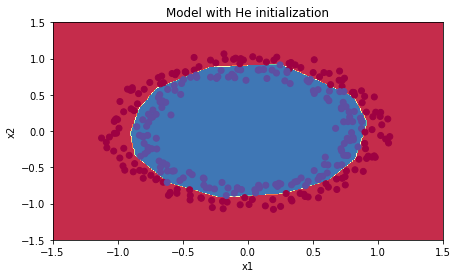

In [15]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 4. He Initialization

Lastly, let's implement He Initizalition.

In [16]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
    import math
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))*math.sqrt(2./layers_dims[l-1])      
    return parameters

In [17]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


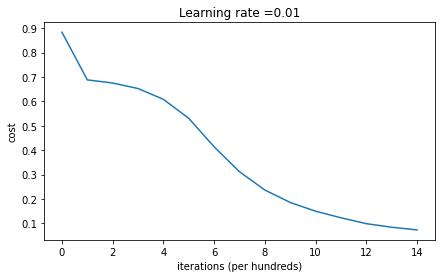

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [18]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

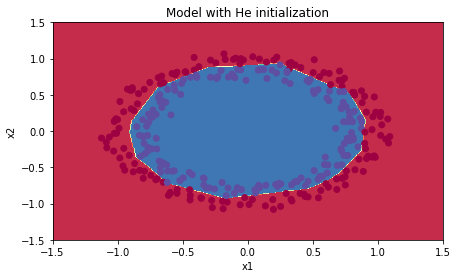

In [19]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# GRADIENT CHECKING

Another technique that we can use to cope with problems related to gradients is gradient checking. Gradient checking is a procedure that we use to check the gradients in backpropogartion step. We don't use it for forward propogation because It's unlikely to have miscalculations in forward propagation (actually I will apply this technique with clipnorm or clipvalue parameters, they do not exactly like gradient checking but they have a similar purpose).

## 1-dimensional Gradient Checking

Let's implement gradient checking for a linear function $J(\theta) = \theta x$.

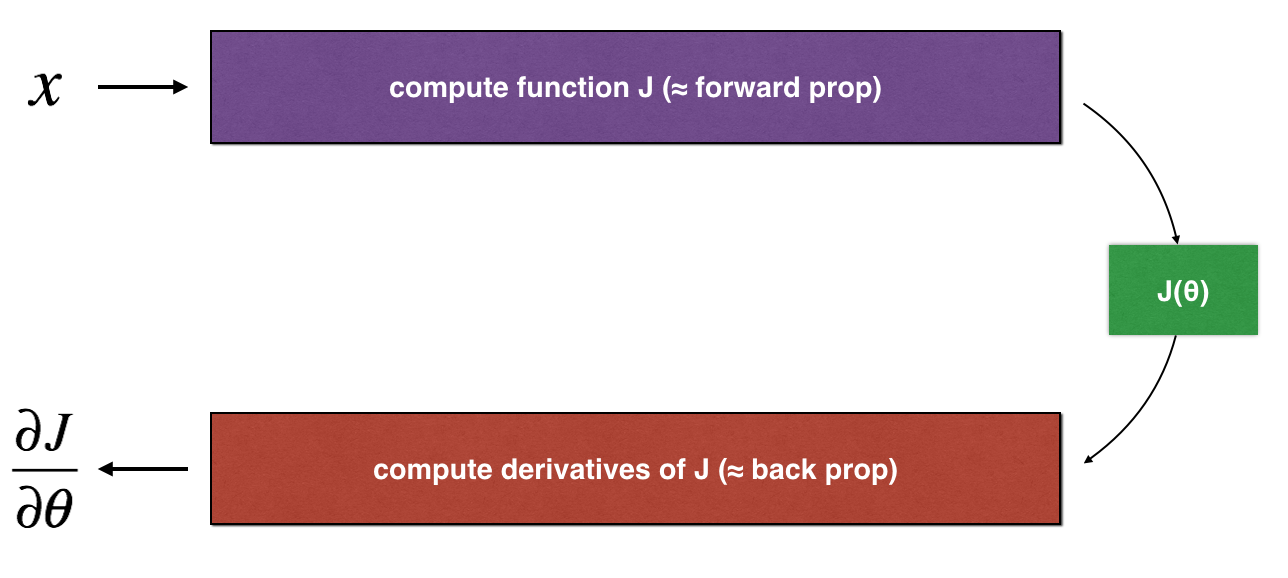

Let's firstly implement forward and backward propagation for our 1-dimensional neural net.

In [20]:
def forward_propagation(x, theta):
    J = np.dot(theta,x)
    return J

In [21]:
def backward_propagation(x, theta):
    dtheta = x
    return dtheta

**Exercise**: To show that the `backward_propagation()` function is correctly computing the gradient $\frac{\partial J}{\partial \theta}$, let's implement gradient checking.

**Instructions**:
- First compute "gradapprox" using the formula above (1) and a small value of $\varepsilon$. Here are the Steps to follow:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
- Then compute the gradient using backward propagation, and store the result in a variable "grad"
- Finally, compute the relative difference between "gradapprox" and the "grad" using the following formula:
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$
You will need 3 Steps to compute this formula:
   - 1'. compute the numerator using np.linalg.norm(...)
   - 2'. compute the denominator. You will need to call np.linalg.norm(...) twice.
   - 3'. divide them.
- If this difference is small (say less than $10^{-7}$), you can be quite confident that you have computed your gradient correctly. Otherwise, there may be a mistake in the gradient computation. 

In [22]:
def gradient_check(x, theta, epsilon = 1e-7):
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    thetaplus = theta + epsilon                           # Step 1
    thetaminus = theta - epsilon                          # Step 2
    J_plus = np.dot(thetaplus,x)                            # Step 3
    J_minus = np.dot(thetaminus,x)                        # Step 4
    gradapprox = (J_plus - J_minus)/(2*epsilon)                              # Step 5
    
    # Check if gradapprox is close enough to the output of backward_propagation()
    grad = x
    
    numerator = np.linalg.norm(gradapprox-grad)                         # Step 1'
    denominator = np.linalg.norm(gradapprox) + np.linalg.norm(grad)     # Step 2'
    difference = numerator/denominator                                  # Step 3'
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [23]:
import numpy as np
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


The difference is lower than our threshold which means that gradients are calculated correctly. Let's now implement this function for N-dimensional neural network.

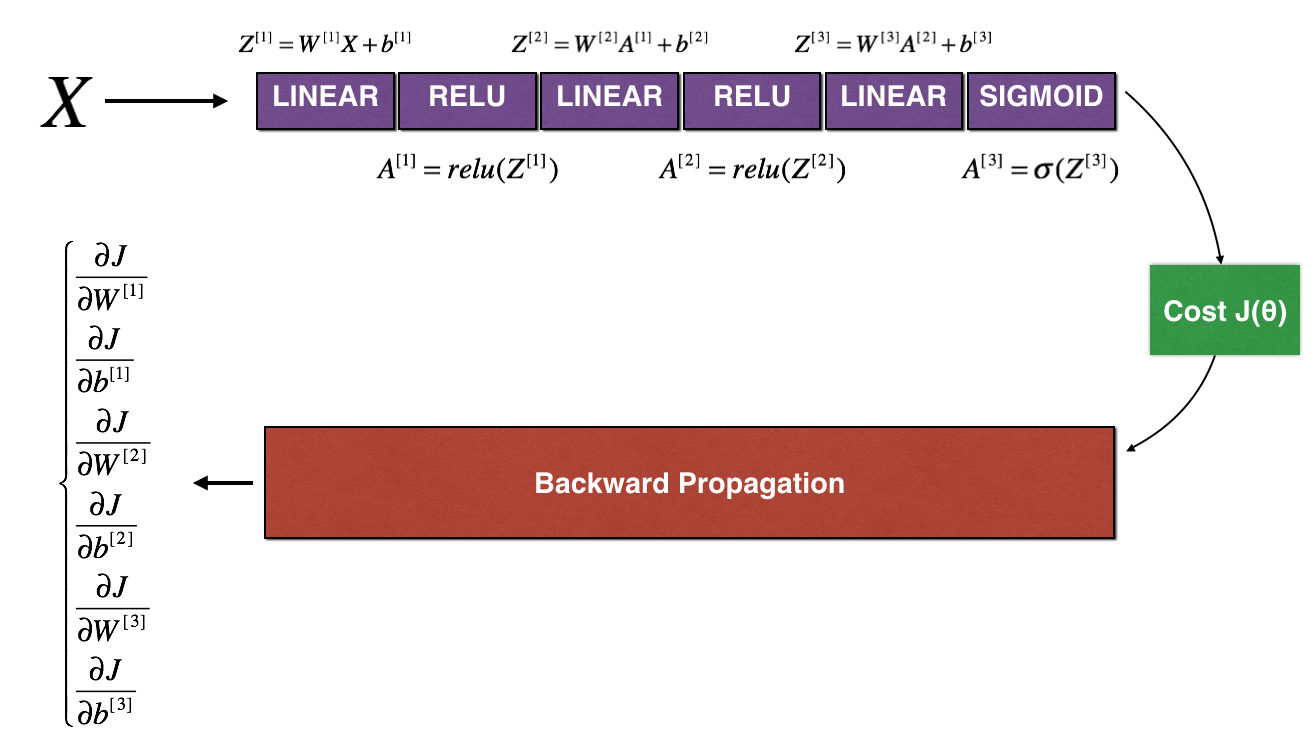

As in the previous case, let's firstly implement forward and back propagation.

In [24]:
def forward_propagation_n(X, Y, parameters):
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1) 
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [25]:
def backward_propagation_n(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

For N-dimensional gradient checking we need some changes. We still need to calculate "gradapprox" to compare the gradient computer by backpropagation.

$$ gradapprox = \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$


However, this time we have a dictionary called parameters instead of a scalar $\theta$ that we had in 1-dimensional case. We will use "`dictionary_to_vector()`" and "`vector_to_dictionary`" functions for converting parameters into a vector and back to dictionary. The function does the operation illustrated below and I will call it from helper_func.py

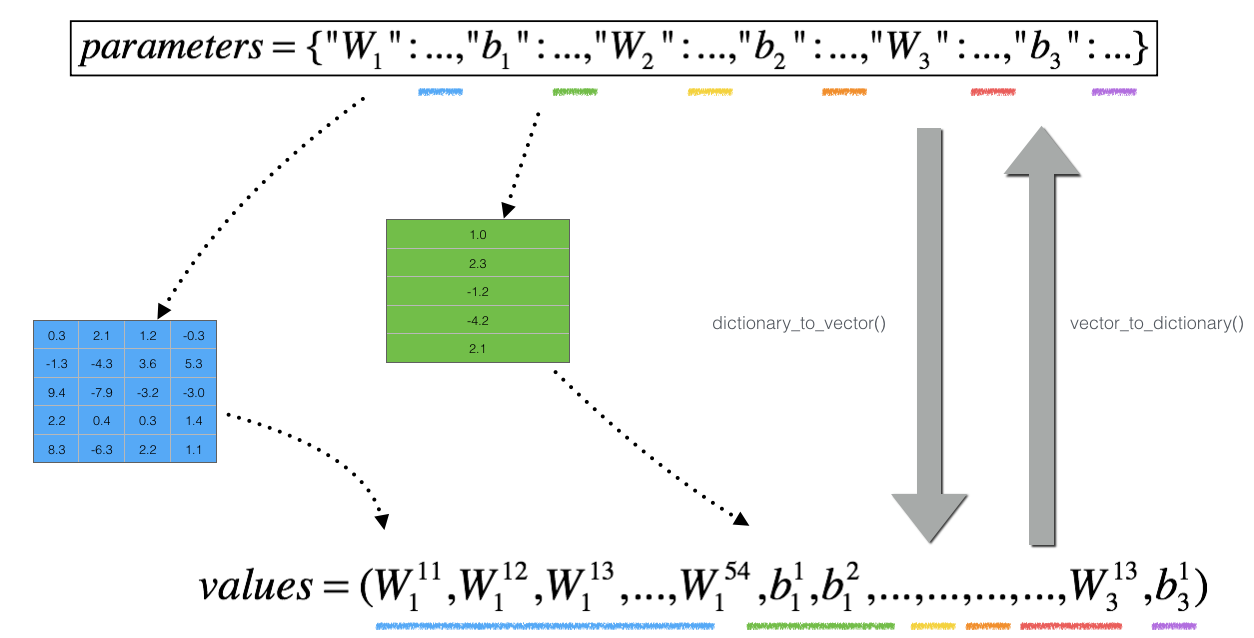

**Instructions**: Here is pseudo-code that will help you implement the gradient check.

For each i in num_parameters:
- To compute `J_plus[i]`:
    1. Set $\theta^{+}$ to `np.copy(parameters_values)`
    2. Set $\theta^{+}_i$ to $\theta^{+}_i + \varepsilon$
    3. Calculate $J^{+}_i$ using to `forward_propagation_n(x, y, vector_to_dictionary(`$\theta^{+}$ `))`.     
- To compute `J_minus[i]`: do the same thing with $\theta^{-}$
- Compute $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$

Thus, you get a vector gradapprox, where gradapprox[i] is an approximation of the gradient with respect to `parameter_values[i]`. You can now compare this gradapprox vector to the gradients vector from backpropagation. Just like for the 1D case (Steps 1', 2', 3'), compute: 
$$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 } \tag{3}$$

In [26]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        thetaplus = np.copy(parameters_values)                                       # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                  # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))  # Step 3
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                 # Step 2
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    numerator = np.linalg.norm(grad - gradapprox)                       # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)     # Step 2'
    difference = numerator/denominator                                  # Step 3'

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [28]:
from utils.helper_func import gradients_to_vector,vector_to_dictionary,dictionary_to_vector,gradient_check_n_test_case,relu,sigmoid

X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

Your backward propagation works perfectly fine! difference = 1.1885552035482147e-07


### Notes 
- Gradient Checking is slow! Approximating the gradient with $\frac{\partial J}{\partial \theta} \approx  \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ is computationally costly. For this reason, we don't run gradient checking at every iteration during training. Just a few times to check if the gradient is correct. 
- Gradient Checking, at least as we've presented it, doesn't work with dropout. You would usually run the gradient check algorithm without dropout to make sure your backprop is correct, then add dropout. 
- Keras uses Glorot initialization with a uniform distribution by default.